In [2]:
import pandas as pd

#affichage des premieres lignes
df = pd.read_csv('CO2 Emissions_Canada.csv')
print(df.head())


    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [ ]:
#taille du fichier
print(f"Nombre de lignes : {df.shape[0]}")  # Nombre de lignes
print(f"Nombre de colonnes : {df.shape[1]}")  # Nombre de colonnes

In [ ]:
#affichage de pourcentage des type sur le jeux de données
df.dtypes.value_counts().plot.pie()

In [ ]:
#Résumé statistique (colonnes numériques) :
print(df.describe())  # Moyenne, min, max, etc.

In [ ]:
# affiche le nombre de valeurs manquantes (null ou NaN) pour chaque colonne du DataFrame
print(df.isnull().sum())

pas de valeur nulles pour chaque colonnes

In [ ]:
#affichage du pourcentage des valeurs manquantes pour chaque colonne 
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

In [ ]:
# extraire le type des données 
print(df.dtypes)

In [3]:
doublons = df.duplicated()
print(f"Nombre de doublons : {doublons.sum()}")

Nombre de doublons : 1103


In [4]:
# Identifier les doublons (toutes les colonnes)
doublons = df[df.duplicated()]

# Afficher les doublons
print(doublons)


              Make       Model            Vehicle Class  Engine Size(L)  \
1075         ACURA     RDX AWD              SUV - SMALL             3.5   
1076         ACURA         RLX                 MID-SIZE             3.5   
1081    ALFA ROMEO          4C               TWO-SEATER             1.8   
1082  ASTON MARTIN         DB9              MINICOMPACT             5.9   
1084  ASTON MARTIN  V8 VANTAGE               TWO-SEATER             4.7   
...            ...         ...                      ...             ...   
7356        TOYOTA      Tundra  PICKUP TRUCK - STANDARD             5.7   
7365    VOLKSWAGEN    Golf GTI                  COMPACT             2.0   
7366    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7367    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7368    VOLKSWAGEN   Jetta GLI                  COMPACT             2.0   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
1075          6        

In [ ]:
print(df['Make'].unique())
print(df['Make'].value_counts())

In [ ]:
#supprimer doublons
df.drop_duplicates()

In [6]:
# Supprimer les doublons (en gardant la première occurrence)
df_unique = df.drop_duplicates()

# Sauvegarder le DataFrame sans doublons dans un nouveau fichier CSV
df_unique.to_csv('fichier_sans_doublons.csv', index=False)
print("Le fichier sans doublons a été créé avec succès !")

print(df_unique)

Le fichier sans doublons a été créé avec succès !
       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z     

In [8]:
doublons = df_unique.duplicated()

print(f"Nombre de doublons : {doublons.sum()}")

Nombre de doublons : 0


In [7]:
df2 = pd.read_csv('fichier_sans_doublons.csv')
#taille du fichier
print(f"Nombre de lignes : {df2.shape[0]}")  # Nombre de lignes
print(f"Nombre de colonnes : {df2.shape[1]}")  # Nombre de colonnes


Nombre de lignes : 6282
Nombre de colonnes : 12


In [ ]:
#ajouter le pourcentage de chaque val aberantes

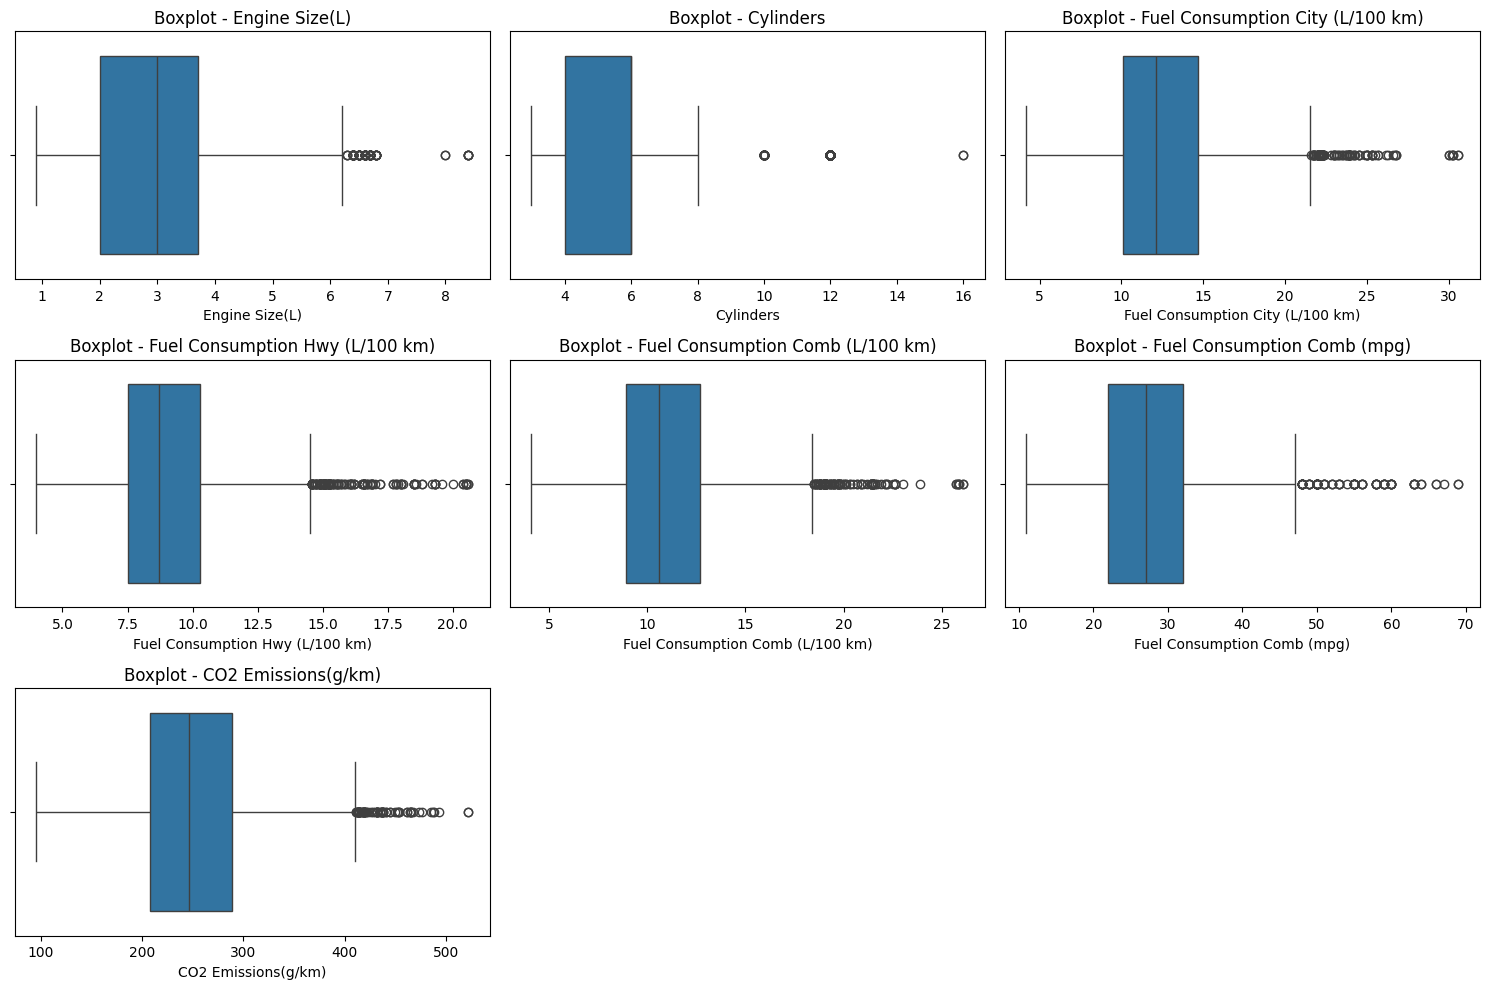

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colonnes numériques à analyser
colonnes_numeriques = [
    'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
    'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'
]

# Visualisation des boîtes à moustaches
plt.figure(figsize=(15, 10))
for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_unique, x=col)
    plt.title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()



In [ ]:
# Fonction pour détecter et supprimer les valeurs aberrantes
def supprimer_valeurs_aberrantes(df_unique, colonnes):
    df_clean = df_unique.copy()
    for col in colonnes:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        borne_inferieure = Q1 - 1.5 * IQR
        borne_superieure = Q3 + 1.5 * IQR
        
        # Supprimer les valeurs hors des bornes
        df_clean = df_clean[(df_clean[col] >= borne_inferieure) & (df_clean[col] <= borne_superieure)]
    
    return df_clean

# Supprimer les valeurs aberrantes
df_sans_aberrantes = supprimer_valeurs_aberrantes(df, colonnes_numeriques)

# Afficher le résultat final
print("DataFrame après suppression des valeurs aberrantes :")
print(df_sans_aberrantes)

DataFrame après suppression des valeurs aberrantes :
       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
5     ACURA          RLX        MID-SIZE             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z  

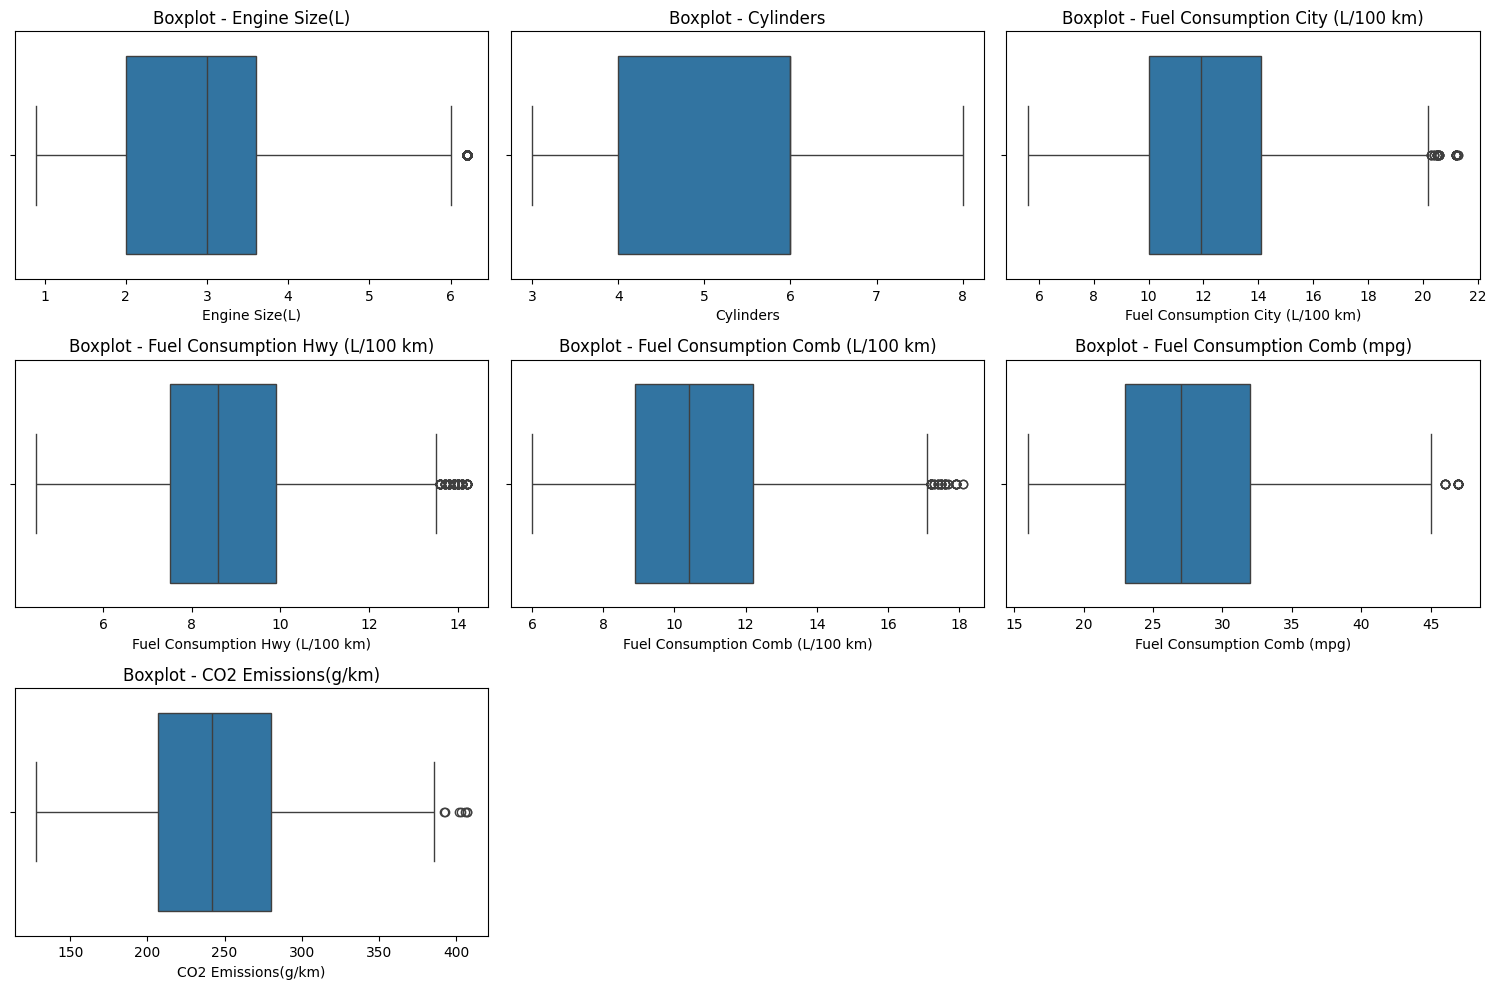

In [31]:
# Visualisation des boîtes à moustaches
plt.figure(figsize=(15, 10))
for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_sans_aberrantes, x=col)
    plt.title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()